<a href="https://colab.research.google.com/github/RalphLynnMora/Coding-Projects/blob/main/SVM%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X:
[[ 2.71110739  2.5020688   2.92730415  2.24725834  2.31317046  0.62279168
  -2.24913729 -2.540159   -2.70212423 -2.14780208 -2.65847378 -2.43218911
  -2.23716964 -2.58832104 -2.62442557 -2.61073755 -0.31968975  2.71202954
   0.50674508 -2.12338355 -0.49360669  2.75846664  0.41359968 -2.03324869
  -0.18597372  2.47440507  2.78690804  0.7767961  -0.18939178  0.00360273
  -0.35612971  0.60845975 -0.40578534  0.54366929 -2.45043774 -0.24337194
   2.60789467  2.54338129  2.7278762   2.58360524  0.60271369 -0.12659258
   0.41310386 -0.80314207  0.5144727  -2.45709133 -0.35569419  2.52146318
   2.65102385  1.00092334 -0.33969714  0.69546306 -0.52590628  0.22294858
  -2.95962232 -2.60373612 -1.01607433  2.60270981  2.4234366   2.23732503
   2.52617482  2.35227356  2.59015525  0.64152527 -0.64036683  0.45254376
  -0.45702085  0.21859156 -2.4570385  -0.78620373  0.6131434  -0.58703273
   2.21269145  2.38400528  2.39246508  0.71370418 -0.46533906  0.30874451
  -2.17018674 -2.37470192 -2.567264

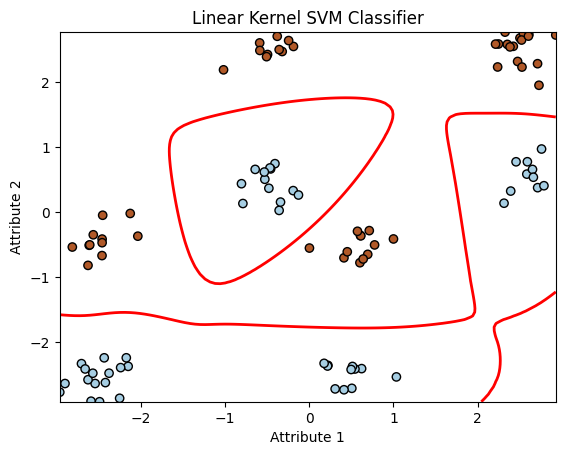

Linear Kernel: Test Error: 0.0
Polynomial Kernel: Test Error: 0.0010000000000000009
RBF Kernel: Test Error: 0.0


In [ ]:
#  importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Generate Training Data.
def data(N, a):
    N = N + 3
    h = np.array([1, a])
    y = np.sign(np.random.randn(N, 1))
    y = np.reshape(y, len(y))
    t = np.arange(N)
    z = np.convolve(h, y)
    z = z[1:N-1]
    y = y[2:N-1]
    X = np.array([z[0:N-3], z[1:N-2]]) + 0.2 * np.random.randn(2, N-3)
    return X, y

# visulatising the dataset for a=0.2
X, y = data(100, 1.5)
print("X:")
print(X)
print("\ny:")
print(y)

# Function to map data into 10-Dimensional Hilbert Space
def map(X):
    N = X.shape[1]
    mat = np.zeros((10, N))
    mat[0] = X[0]
    mat[1] = X[1]
    mat[2] = X[0] ** 2
    mat[3] = X[1] ** 2
    mat[4] = X[0] * X[1]
    return mat

# 6.3 Task A
X_mapped = map(X)
clf = svm.SVC(gamma = .2,kernel='rbf')  # You can choose different kernels like 'rbf' for radial basis function
clf.fit(X_mapped.T, y)
# Create a meshgrid in 10-dimensional space
xx, yy = np.meshgrid(np.linspace(X_mapped[0].min(), X_mapped[0].max(), 100),
                     np.linspace(X_mapped[1].min(), X_mapped[1].max(), 100))

# Map the meshgrid points into 10-dimensional space
meshgrid_mapped = map(np.array([xx.ravel(), yy.ravel()]))

# Predict the labels for each point in the meshgrid
Z = clf.decision_function(meshgrid_mapped.T)

# Reshape the predictions to the meshgrid shape
Z = Z.reshape(xx.shape)
# Plot the decision boundary
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
# Plot the training data
plt.scatter(X_mapped[0], X_mapped[1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Attribute 1')
plt.ylabel('Attribute 2')
plt.title('Linear Kernel SVM Classifier')
plt.show()

# 6.3 Task B
# Function for matrix of kernel dot products for a linear kernel
def linear_kernel(X):
    return np.dot(X, X.T)

# Function for matrix of kernel values for a polynomial kernel
def polynomial_kernel(X, degree=3, coef0=1):
    return np.power((np.dot(X, X.T) + coef0), degree)

# Function for matrix of kernel values for a square exponential (RBF) kernel
def square_exponential_kernel(X, gamma=1.0):
    pairwise_dists = np.sum(X**2, axis=1)[:, np.newaxis] - 2 * np.dot(X, X.T) + np.sum(X**2, axis=1)
    return np.exp(-gamma * pairwise_dists)

def generate_datasets(N_train, N_val, N_test, a):
    # training set
    X_train, y_train = data(N_train, a)
    X_train_mapped = map(X_train)

    # validation set
    X_val, y_val = data(N_val, a)
    X_val_mapped = map(X_val)

    # test set
    X_test, y_test = data(N_test, a)
    X_test_mapped = map(X_test)

    return X_train_mapped, y_train, X_val_mapped, y_val, X_test_mapped, y_test

# Function to perform grid search for SVM parameters on the training set
def perform_grid_search(X_train, y_train, kernel, param_grid):
    svm_model = svm.SVC(kernel=kernel)
    grid_search = GridSearchCV(svm_model, param_grid, cv=5)
    grid_search.fit(X_train.T, y_train)
    best_params = grid_search.best_params_
    return best_params

# Function to compute the test error for an SVM model on the test set
def compute_test_error(X_train, y_train, X_test, y_test, kernel, params):
    svm_model = svm.SVC(kernel=kernel, **params)
    svm_model.fit(X_train.T, y_train)
    test_error = 1 - svm_model.score(X_test.T, y_test)
    return test_error

# Set seed for reproducibility
np.random.seed(42)
# Parameters for grid search
param_grid = {'gamma': [0.1, 1, 10], 'C': [0.1, 1, 10]}
# Generating datasets
N_train = 100
N_val = 110
N_test = 1000
a = 0.2
X_train, y_train, X_val, y_val, X_test, y_test = generate_datasets(N_train, N_val, N_test, a)

# Perform grid search for linear kernel
best_params_linear = perform_grid_search(X_train, y_train, 'linear', param_grid)

# Perform grid search for polynomial kernel
best_params_poly = perform_grid_search(X_train, y_train, 'poly', param_grid)
# Perform grid search for square exponential (RBF) kernel
best_params_rbf = perform_grid_search(X_train, y_train, 'rbf', param_grid)
# Computing test error for all 3 kernel
test_error_linear = compute_test_error(X_train, y_train, X_test, y_test, 'linear', best_params_linear)
test_error_poly = compute_test_error(X_train, y_train, X_test, y_test, 'poly', best_params_poly)
test_error_rbf = compute_test_error(X_train, y_train, X_test, y_test, 'rbf', best_params_rbf)
# Test errors for all 3 kernals.
print("Linear Kernel: Test Error:", test_error_linear)
print("Polynomial Kernel: Test Error:", test_error_poly)
print("RBF Kernel: Test Error:", test_error_rbf)